In [1]:
#Import libraries
import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook') 
import numpy as np
import pandas as pd
import scipy.io as sio
from scipy.stats import norm
from scipy.stats import gaussian_kde

#  Comparing Sensitivity of Human and Machine with Signal Detection Theory

How well can people detect sinusoidal patterns embedded in noise? Can machines detect the patterns better? 

In this notebook I examine data collected from one human and one machine. The person completed 5000 trials of a task where he viewed a noisy stimuli and then reported whether he saw the signal. The signal was only actaually present about half of the time. The machine was a simple sensor that responded with a number indicating the liklihood of a signal being present. 

In this task the signal was a sinusoidal grating like the image titled "Signal". It was always shown embedded in noise like in the image titled "Signal + Noise". On about half of the trials no signal was shown, only noise, like in the image titled "Noise"

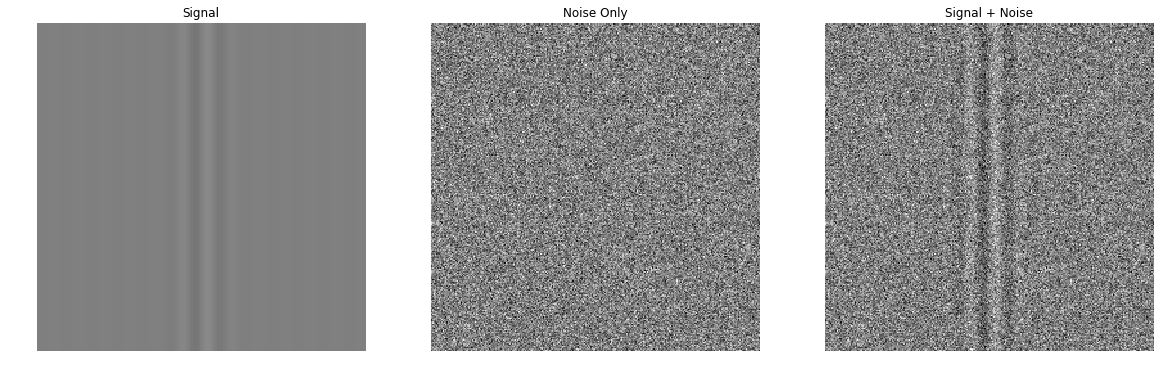

In [2]:
#Make example stimuli
signal_strength=3
row=np.linspace(-40,40,256)
col=np.ones_like(row)[:,np.newaxis]
signal = np.sin(row*col) * norm.pdf(row,0,5) 
noise = np.random.normal(loc = 0, scale=.3, size = (256,256))
signalstate1 = noise
signalstate2 = signal_strength * signal + noise
#Plot
fig, ax = plt.subplots(1,3, figsize = [20,20])
ax[0].imshow(signal, cmap='gray', vmax =1, vmin = -1); ax[0].axis('off'); ax[0].set_title('Signal')
ax[1].imshow(signalstate1, cmap='gray', vmax =1, vmin = -1); ax[1].axis('off'); ax[1].set_title('Noise Only')
ax[2].imshow(signalstate2, cmap='gray', vmax =1, vmin = -1); ax[2].axis('off'); ax[2].set_title('Signal + Noise')
plt.show()

In the example above, the signal is easy to see. We can make it harder by turning down the signal strength. The images  below show example stimuli with a stronger and weaker signal.

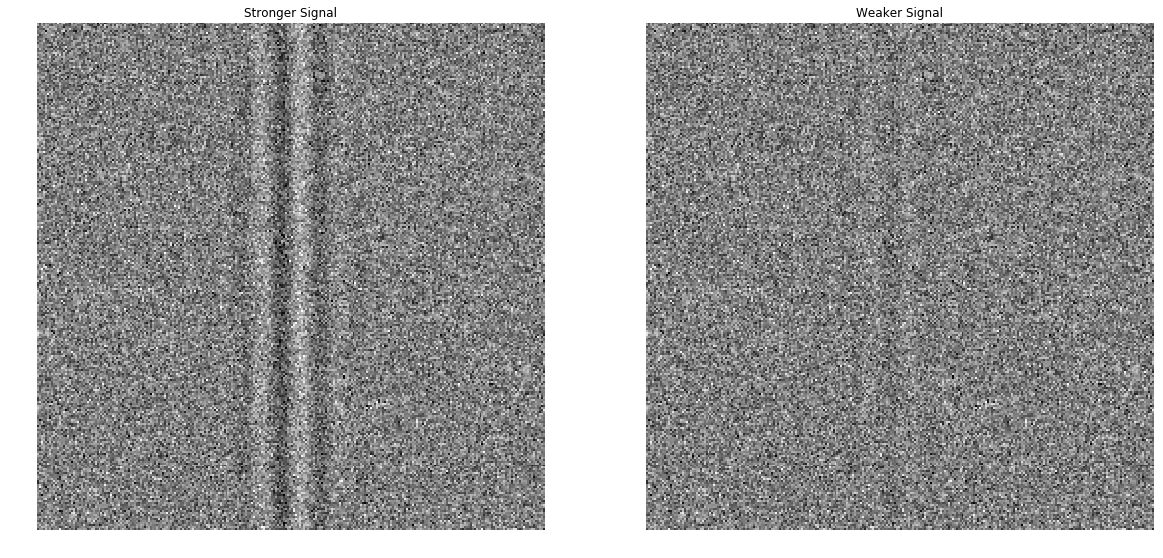

In [3]:
signal_strength=[4,1]    
fig, ax = plt.subplots(1,2, figsize = [20,20])
ax[0].imshow(signal*signal_strength[0]+noise, cmap='gray', vmax =1, vmin = -1)
ax[0].axis('off'); ax[0].set_title('Stronger Signal')
ax[1].imshow(signal*signal_strength[1]+noise, cmap='gray', vmax =1, vmin = -1)
ax[1].axis('off'); ax[1].set_title('Weaker Signal')
plt.show()

## Signal Detection Theory

### The Decision Variable 

When you look at the images above you have some sense of whether there is a signal present. In Signal Detection Theory, this is called the "Decision Variable", a name which recognizes that its value depends on more than just the properties of the stimuli. It can also be affected things like experiences and expectations. We will be looking at distributions of Decision Variables under different conditions.

### Two Conditional Distributions

Accordign to Signal Detection Theory, we can think of sensory detection as trying to seporate instances of noise from instances of the sensory signal based on a the inherently noisy Decision Variable.

We can model the distribution of Decision Variables in each of the two conditions (noise only, signal+noise) with two normal distributions:

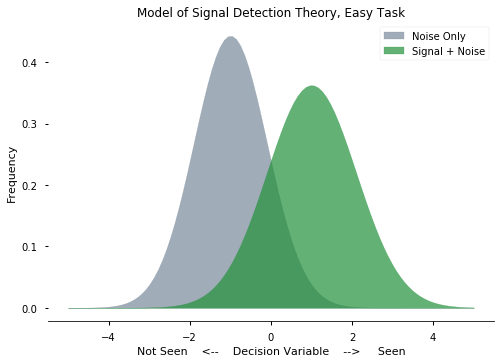

In [4]:
# define distibution parameters
x = np.linspace(-5,5,100)
noise_mu = -1
noise_sd = .9
signal_mu = 1
signal_sd = 1.1
#make distributions
noise_dist = norm.pdf(x,noise_mu,noise_sd)
signal_dist = norm.pdf(x,signal_mu,signal_sd)
#Plot distributions
ax=plt.axes()
plt.fill_between(x,noise_dist, color='#788999', alpha=.7)
plt.fill_between(x,signal_dist, color='#21913B', alpha=.7)
plt.legend(['Noise Only','Signal + Noise'])
plt.xlabel('Not Seen    <--    Decision Variable    -->     Seen')
plt.ylabel('Frequency')
plt.title('Model of Signal Detection Theory, Easy Task')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

In the figure above we see the two normal ditributions for the Noise Only and Signal + Noise conditions. In this example, detection is easy because its  easy to seporate the distributions.


### The Criterion, Hits, and False Alarms
According to signal detection theroy, when we are faced with a detection problem like this we set a cut-off somewhere along the Decision Variable axis. We monitor this value and if it goes above some criterion we report that the signal was present. If the response fails to pass that criterion we report that it was not present. We are free to place that criterion wherever we wish along the decision variable axis. If we wish to minimize False Alarms we can set a more conservative criterion, and if we wish to maxmize Hits we can set a more liberal criterion. 

In the following example the task is harder and mistakes will be made no matter where we place the criterion. The result of each trial can be classified  into 1 of 4 categories: Hit, Miss, False Alarm, and Correct Rejection. The code below generates a figure illustrating the classification.

Expected False Alarms: 13.33 %
Expeected Hit Rate: 81.83 %


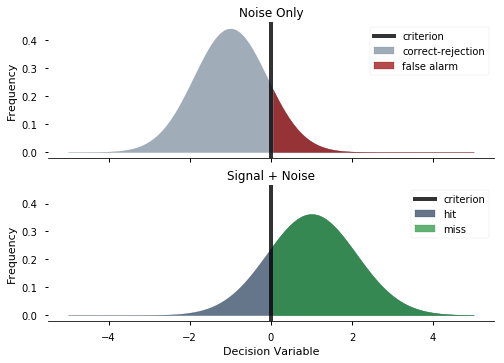

In [5]:
criterion = 0
#Porportions of each conditional distribution falling above the criterion:
hit_rate = 1- norm.cdf(criterion,signal_mu,signal_sd)
fa_rate = 1 - norm.cdf(criterion,noise_mu,noise_sd)
xhigh = x[x>criterion]
noise_high = norm.pdf(xhigh,noise_mu,noise_sd)
signal_high = norm.pdf(xhigh,signal_mu,signal_sd)
print('Expected False Alarms:', np.round(fa_rate,4) * 100, '%')
print('Expeected Hit Rate:', np.round(hit_rate,4) * 100, '%')

#Plot
fig,ax = plt.subplots(2,1, sharey=True,sharex=True)
ax[0].fill_between(x,noise_dist, color='#788999', alpha =.7)
ax[0].fill_between(xhigh,noise_high,color ='#930000', alpha=.7)
ax[0].axvline(criterion, color = 'k', alpha = .8, linewidth=4)
ax[0].legend(['criterion','correct-rejection','false alarm'])
ax[0].title.set_text('Noise Only'); ax[0].set_ylabel('Frequency')
#ax[0].x
ax[0].spines['top'].set_visible(False); ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[1].fill_between(x,signal_dist,color ='#243C59', alpha=.7)
ax[1].fill_between(xhigh,signal_high,color ='#21913B', alpha=.7)
ax[1].axvline(criterion, color = 'k', alpha = .8,linewidth=4)
ax[1].legend(['criterion','hit','miss']); ax[1].title.set_text('Signal + Noise')
ax[1].set_xlabel('Decision Variable'); ax[1].set_ylabel('Frequency')
ax[1].spines['top'].set_visible(False); ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
plt.show()

In this example we started with model parameters and calculated the distributions. Most often however, we don't know the parameters of the underlying distributions. 

If we can assume that the two distributions are normally distributed and of equal variance then the distance between the two distributions can be calculated from the proportion of hits and false-alarms.The proportion of hits and false-alarms can be calculated using the cumulative normal distribution:

### d' and bias

Now we can use the expected hit and false alarms rates to calculate the distance between the two distributions and the location of the criterion. The values are in standardized z-scores, with the standard deviations of both distributions set to 1.

d': 2.02
bias: 0.101


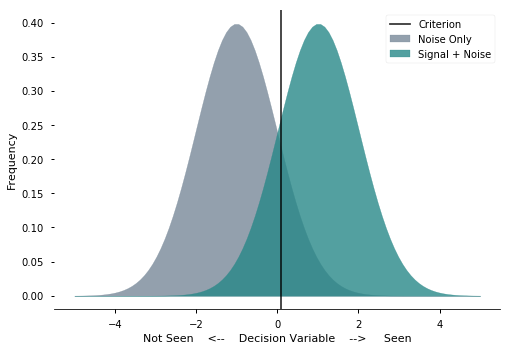

In [6]:
def calc_dprime(hit_rate,fa_rate):
    """Calculate dprime and bias from hit and fa rates"""
    zhit = norm.ppf(1 - hit_rate)
    zfa = norm.ppf(1 - fa_rate)
    dprime = zfa - zhit
    bias =  (zfa+zhit)/2
    return dprime, bias
#Calculate d' and bias from hit and false alarm rates
dprime, bias = calc_dprime(hit_rate,fa_rate)
#Use d' and bias in model 
noise_mu = -dprime/2
signal_mu = dprime/2
noise_sd = 1
signal_sd = 1
criterion = bias
noise_dist = norm.pdf(x,noise_mu,noise_sd)
signal_dist = norm.pdf(x,signal_mu,signal_sd)
#Report and Plot
print("d':", np.round(dprime,3))
print('bias:', np.round(bias,3))
ax = plt.axes()
plt.fill_between(x,noise_dist, color='#788999', alpha=.8)
plt.fill_between(x,signal_dist, color='#288888', alpha=.8)
plt.axvline(criterion, color = '#000000', alpha = .8,)
plt.legend(['Criterion','Noise Only','Signal + Noise'])
plt.xlabel('Not Seen    <--    Decision Variable    -->     Seen')
plt.ylabel('Frequency')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

We have seen how we can go from model parameters to hit and false-alarm rates, and back to model parameters. 

Now lets use this theory to examine how well a Human and Machine did on the task

# Examine Human Data

## Load Data


In [7]:
#Load data 
mat = sio.loadmat('grating.mat')
stim = pd.DataFrame(mat['stim'], index=range(0,5000), columns=['stim']) 
rhum = pd.DataFrame(mat['rhum'], index=range(0,5000), columns=['rhum'])
rmod = pd.DataFrame(mat['rmod'], index=range(0,5000), columns=['rmod'])
data=pd.concat([stim,rhum,rmod],axis=1)
pc_hum = data[data.stim == data.rhum].size / data.size * 100
print('Human Percent Correct: ', pc_hum, '%')
data.head()

Human Percent Correct:  72.78 %


,stim,rhum,rmod
0,1,1,4.099681
1,1,1,4.044857
2,1,1,3.960009
3,2,2,4.572566
4,2,1,3.964160


## Evaluate with Signal Detection Theory
To begin, we can count the proportion of trials resulting in Hits and False Alarms.

In [8]:
def count_responses(stim,response):
    """hit,fa = count_sdt(stim,response)
    count hits and false alrms from stimulus and response """
    #hit,fa,nhit,nfa = count_sdt(stim,response). 
    #Count trials in each conditional distribution of signal state
    nhit = data[(stim==2) & (response == 2)].size
    hit = nhit /  data[stim==2].size 
    nfa = data[(stim==1) & (response == 2)].size
    fa = nfa / data[(stim==1)].size
    return(hit,fa)
hit_hum, fa_hum = count_responses(data['stim'],data['rhum'])
print('Signal + Noise Trials Resulting in Hits:', np.round(hit_hum,4)*100, '%')
print('Noise Trials Resulting in False Alarms:', np.round(fa_hum,4)*100, '%')

Signal + Noise Trials Resulting in Hits: 65.58 %
Noise Trials Resulting in False Alarms: 20.14 %


Now we can use the proportion of Hits and False Alarms to calculate d' and bias.

In [9]:
## Compute d' 
dprime_hum, bias_hum = calc_dprime(hit_hum,fa_hum)
print("d' =" , np.round(dprime_hum,3))
print("bias =", np.round(bias_hum,3))

d' = 1.237
bias = 0.218


d' tells us that the two distributions are seporated by only 1.24 standard deviations.
The bias tells us that a slightly conservative criteria was used. 

We can now use these numbers to make a model and visualize the underlying distributions:

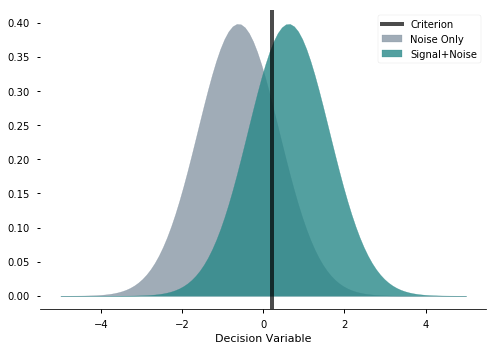

In [10]:
#Plot model of human's responses
x = np.linspace(-5,5,100)
dv1 = norm.pdf(x,-0.5*dprime_hum,1)
dv2 = norm.pdf(x,0.5*dprime_hum,1)
ax = plt.axes()
plt.fill_between(x,dv1, alpha = .7, color= '#788999')
plt.fill_between(x,dv2, alpha = .8, color= '#288888')
plt.axvline(bias_hum, color = '#000000', alpha = .7,linewidth=4)
plt.xlabel('Decision Variable')
plt.legend(['Criterion','Noise Only','Signal+Noise'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

Here we have plotted the infered underlying distributions of Decision Variables for both the signal states, as well as the location of the criterion.

## Evaluate Machine Performance

The same stimuli that were shown to the human were also processed by a machine. The machine responded with a number for how strongly it recognized the signal. Below I fit normal distributions to the model responses under the Noise Only and Signal+Noise conditions.

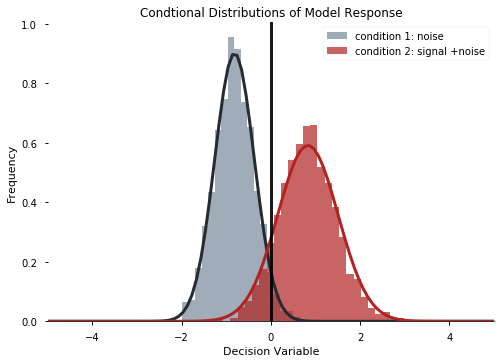

In [11]:
#First scale model response by its standard deviation and set mean response to 0
data['rmod'] = (data['rmod'] - data['rmod'].mean() ) / data['rmod'].std() 
#Find distribution of model response for each condition
r1mod = data.ix[data['stim']==1,'rmod']
r2mod = data.ix[data['stim']==2,'rmod']
#fit univariate normal distribution to each conditional distribution
r1mu, r1sd = norm.fit(r1mod)
r2mu, r2sd = norm.fit(r2mod)
r1fit = norm.pdf(x,r1mu,r1sd)
r2fit = norm.pdf(x,r2mu,r2sd)
#plot
ax = plt.axes()
plt.hist(r1mod, normed=True, bins=20, alpha = .7, color = '#788999')
plt.hist(r2mod, normed=True, bins=50, alpha = .7, color = '#b22222')
plt.legend(['condition 1: noise', 'condition 2: signal +noise'])
plt.plot(x, r1fit, linewidth = 3, alpha = 1, color = '#252b30')
plt.plot(x, r2fit, linewidth = 3, alpha = 1, color = '#b22222');
plt.axvline(0, color = 'k', alpha =.9, linewidth=3)
plt.xlabel('Decision Variable')
plt.xlim([-5,5])
plt.ylabel('Frequency')
plt.title('Condtional Distributions of Model Response')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

We see that the machine responses in the two conditions are well modeled as normal distributions. Now we can calculate d' as the distance between the means of the distributions in pooled-variance units and compare that to the Human

In [12]:
def calc_sdpool(a,b):
    sdpool = (0.5 * ((a)**2 + (b)**2)) ** 0.5
    return sdpool
def calc_sd2(sdpool,sd1):
    sd2 = (2 * (sdpool ** 2) - (sd1 ** 2)) ** 0.5
    return sd2
# Calculate distance between distributions using pooled variance
d_mod = (r2mu - r1mu) / calc_sdpool(r1sd, r2sd)
print("Machine d =", np.round(d_mod,3), "\t Human d'=", np.round(dprime_hum,3))

Machine d = 2.88 	 Human d'= 1.237


The discriminability index for the machine is much higher than that for the Human! The distributions are more than twice as far apart.

What if we want to know how many Hits and False Alarms the Machine made? We can set a criterion in order to classify responses:

In [13]:
modelcriterion = 0
data.ix[data['rmod']<modelcriterion,'rmodc'] = 1
data.ix[data['rmod']>=modelcriterion,'rmodc'] = 2
hit_mod, fa_mod = count_responses(data['stim'],data['rmodc'])
print('model criterion =', modelcriterion)
print('Signal + Noise Trials Resulting in Hits', np.round(hit_mod,4)* 100, '%')
print('Noise Trials Resulting in False Alarms:', np.round(fa_mod,4)*100, '%')

model criterion = 0
Signal + Noise Trials Resulting in Hits 90.56 %
Noise Trials Resulting in False Alarms: 3.45 %


And now we can calculate d'prime from these values to see how it compares to the one calculated using the means of the distributions:

In [14]:
dprime_mod, bias = calc_dprime(hit_mod,fa_mod)
print("Machine d'", np.round(dprime_mod,3), "\tMachine d =", np.round(d_mod,3),
      "\t Human d'=", np.round(dprime_hum,3))

Machine d' 3.132 	Machine d = 2.88 	 Human d'= 1.237


d' seems to overestimate the actual distance between the distributions. This is probably because d' makes an equality of variance assumption and the Singal+Noise distribution is much wider than the Noise Only distribution.


### ROC curves 
Receiver Operator Characteristic (ROC) show the trade off between hits and false-alarms in discrimination tasks. Lets sweep out the ROC curves describing the performance of both the Human and the Machine. 

For the Human, we can use d' to estimate how the number of hits and false alarms would change with a change in criterion. This is an estimate of the Human ROC curve. For the machine, we can make the same estimation using the model d'. We can also vary the criterion directly to map out the sampled ROC curve:

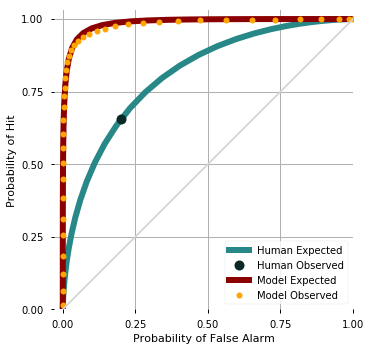

In [15]:
# For Human, calculate estimated FA and Hits for 50 different criterions
criterion_array = np.linspace(-4,4,50)
FA_hum_array = 1 - norm.cdf(criterion_array,0,1)
Hit_hum_array = 1 - norm.cdf(criterion_array,dprime_hum,1)

#Estimate false alarms and hits using model d' to sweep ROC curve using an array of criterion values
criterion_array = np.linspace(-3,dprime_mod+3,50)
FA_mod = 1 - norm.cdf(criterion_array,0,1)
Hit_mod = 1 - norm.cdf(criterion_array,dprime_mod,1)

#Sample false alarm and hit rates at varying criterion levels
criterion_array = norm.ppf(np.linspace(.01,.99,40)) + np.mean([r1mu,r2mu])
hit_list= []
fa_list = []
for criterion in criterion_array:
    data.ix[data['rmod']<criterion,'rmodc'] = 1
    data.ix[data['rmod']>=criterion,'rmodc'] = 2
    phit, pfa = count_responses(data['stim'],data['rmodc'])
    hit_list.append(phit)
    fa_list.append(pfa)
fa_mod_count = np.array(fa_list)
hit_mod_count = np.array(hit_list)

#Plot
ax = plt.axes()
ax.plot(FA_hum_array,Hit_hum_array,color='#288888',linewidth=6,label='Human Expected')
ax.plot(fa_hum,hit_hum,'o',markersize=10,color='#0b2828',label='Human Observed')
ax.plot(FA_mod,Hit_mod,color='#8B0000',linewidth=6,label="Model Expected")
ax.plot(fa_mod_count,hit_mod_count,'o',color ='#FFA500',markersize=6,label="Model Observed")
ax.plot([0,1],[0,1],'lightgray')
ax.axis('scaled')
ax.grid(True)
plt.xlim([-.03,1])
plt.ylim([0,1.03])
plt.xticks([0, .25, .5, .75, 1])
plt.yticks([0, .25, .5, .75, 1])
plt.xlabel('Probability of False Alarm')
plt.ylabel('Probability of Hit')
plt.legend()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

The actual and estimated ROC curves for the model are very close. Both show the superior performance of the machine to the human in this task.